In [ ]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
product_df = pd.read_csv('/content/Products.csv')
customer_df = pd.read_csv('/content/Customers.csv')
transactions_df = pd.read_csv('/content/Transactions.csv')


In [ ]:
print(product_df.columns)
print(customer_df.columns)
print(transactions_df.columns)


Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')
Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')
Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')


# Product EDA

In [ ]:
product_df.shape

(100, 4)

In [ ]:
product_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [ ]:
product_df['Category'].value_counts()

,count
Category,
Books,26
Electronics,26
Clothing,25
Home Decor,23


<ipython-input-16-b4ff49e69d56>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=product_df, x='Category', palette='viridis')


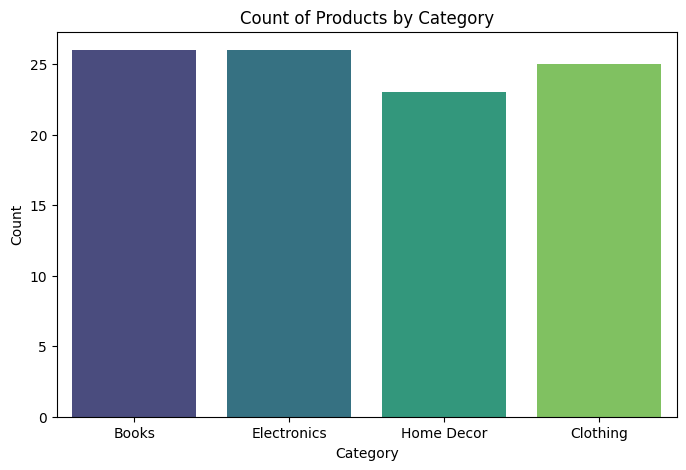

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=product_df, x='Category', palette='viridis')
plt.title('Count of Products by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [ ]:
average_price_by_category = product_df.groupby('Category')['Price'].mean().sort_values(ascending=False)
for i in average_price_by_category.index:
  print(f'Average of product in {i} category is {round(average_price_by_category[i],4)}')

Average of product in Books category is 292.2123
Average of product in Electronics category is 275.3535
Average of product in Clothing category is 263.72
Average of product in Home Decor category is 235.02


Books have higher avg price

<ipython-input-24-bce309532599>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pd.DataFrame(average_price_by_category), x=average_price_by_category.index, y=average_price_by_category.values, palette='viridis')


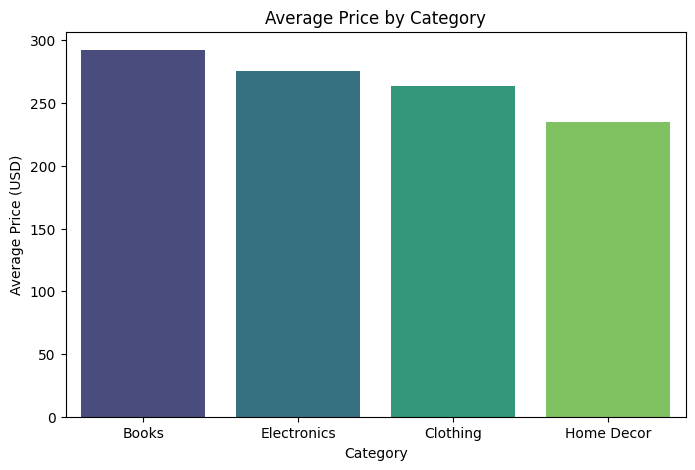

In [ ]:
average_price_by_category = product_df.groupby('Category')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(data=pd.DataFrame(average_price_by_category), x=average_price_by_category.index, y=average_price_by_category.values, palette='viridis')
plt.title('Average Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Price ')
plt.show()


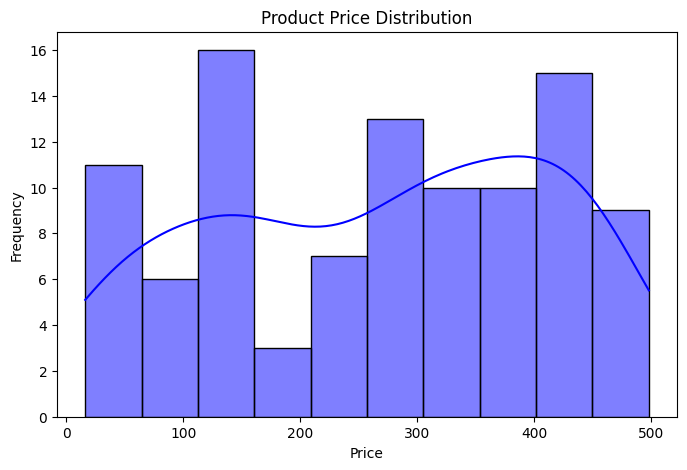

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(product_df['Price'], bins=10, kde=True, color='blue')
plt.title('Product Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Two peaks(100-150 & 400-450) indicate there are two common price ranges where most products fall.

<ipython-input-42-be4632ce4d96>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=product_df, x='Category', y='Price', palette='viridis')


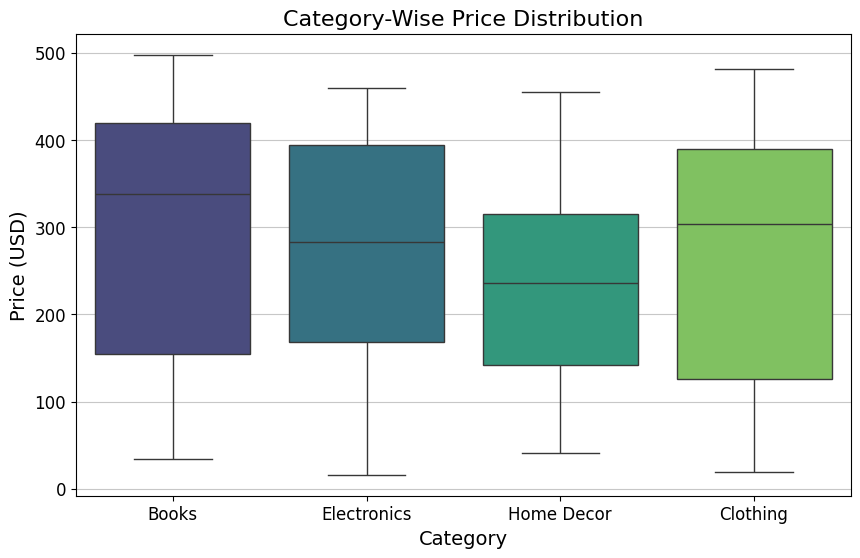

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=product_df, x='Category', y='Price', palette='viridis')
plt.title('Category-Wise Price Distribution', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Price ', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y',alpha=0.7)
plt.show()

Books and Clothing have products price in wide range as compared to electronic and Home Decors

In [ ]:
top_n_products = product_df.nlargest(3, 'Price')
print("Top 3 Most Expensive Products:")
print(top_n_products)

Top 3 Most Expensive Products:
    ProductID         ProductName  Category   Price
74      P075    TechPro Textbook     Books  497.76
31      P032  BookWorld Cookbook     Books  488.63
44      P045   SoundWave T-Shirt  Clothing  481.78


In [ ]:
highest_priced_product = product_df.loc[product_df['Price'].idxmax()]
lowest_priced_product = product_df.loc[product_df['Price'].idxmin()]

print("Highest Priced Product:")
print(f"  ProductID: {highest_priced_product['ProductID']}")
print(f"  ProductName: {highest_priced_product['ProductName']}")
print(f"  Category: {highest_priced_product['Category']}")
print(f"  Price: {highest_priced_product['Price']}")

print("\nLowest Priced Product:")
print(f"  ProductID: {lowest_priced_product['ProductID']}")
print(f"  ProductName: {lowest_priced_product['ProductName']}")
print(f"  Category: {lowest_priced_product['Category']}")
print(f"  Price: {lowest_priced_product['Price']}")



Highest Priced Product:
  ProductID: P075
  ProductName: TechPro Textbook
  Category: Books
  Price: 497.76

Lowest Priced Product:
  ProductID: P056
  ProductName: SoundWave Smartwatch
  Category: Electronics
  Price: 16.08


# Customer EDA

In [ ]:
customer_df.head()

,CustomerID,CustomerName,Region,SignupDate,SignupYearMonth
0,C0001,Lawrence Carroll,South America,2022-07-10,2022-07
1,C0002,Elizabeth Lutz,Asia,2022-02-13,2022-02
2,C0003,Michael Rivera,South America,2024-03-07,2024-03
3,C0004,Kathleen Rodriguez,South America,2022-10-09,2022-10
4,C0005,Laura Weber,Asia,2022-08-15,2022-08


In [ ]:
customer_df['Region'].value_counts()

,count
Region,
South America,59
Europe,50
North America,46
Asia,45


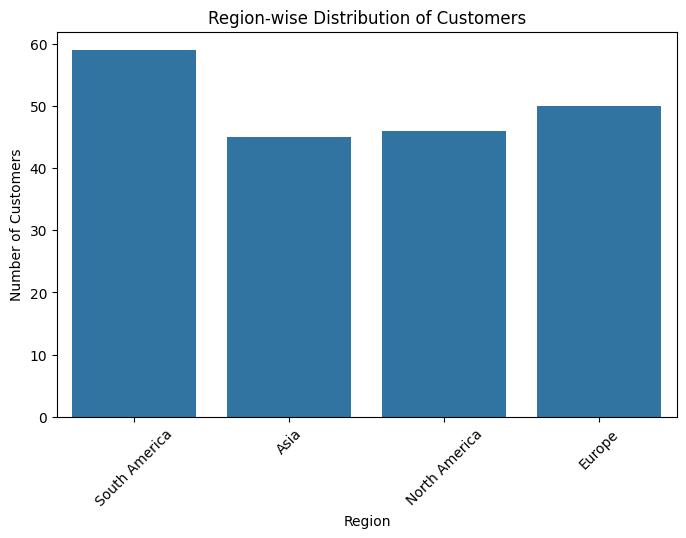

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Region', data=customer_df)
plt.title("Region-wise Distribution of Customers")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

***Provided Ecommerce covers South America , North America , Asia and Europe . Most Customers are from South America***


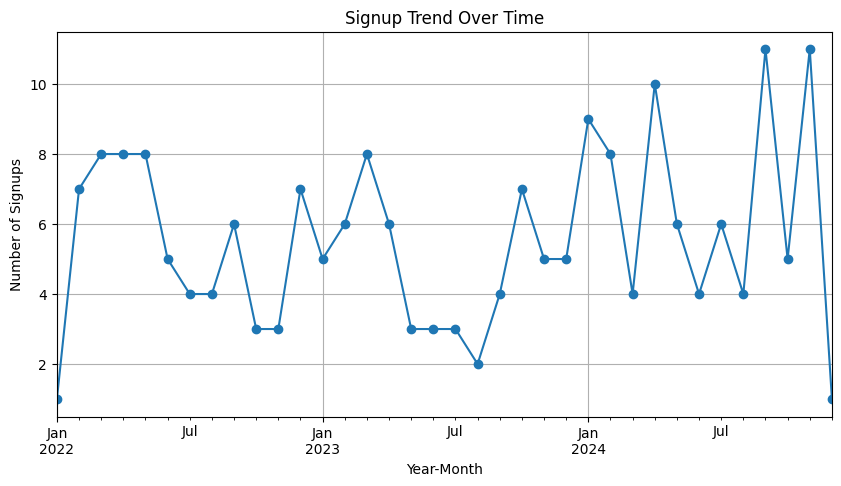

In [ ]:
plt.figure(figsize=(10, 5))
customer_df['SignupDate'] = pd.to_datetime(customer_df['SignupDate'])
customer_df['SignupYearMonth'] = customer_df['SignupDate'].dt.to_period('M')
signup_trend = customer_df['SignupYearMonth'].value_counts().sort_index()
signup_trend.plot(kind='line', marker='o')
plt.title("Signup Trend Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Signups")
plt.grid()
plt.show()

***The fluctuations in signup numbers seem irregular***

# Transaction EDA

In [ ]:
merged_data = transactions_df.merge(customer_df, on='CustomerID', how='left')
merged_data = merged_data.merge(product_df, on='ProductID', how='left')

In [ ]:
transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [ ]:
transactions_df.shape

(1000, 7)

In [ ]:
transactions_df['TransactionID'].value_counts()

,count
TransactionID,
T00001,1
T00134,1
T00630,1
T00899,1
T00096,1
...,...
T00416,1
T00471,1
T00566,1


***Only 1 product bought during a transaction***

In [ ]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,SignupYearMonth,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,2022-12,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,2024-09,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,2024-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,2024-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,2022-03,ComfortLiving Bluetooth Speaker,Electronics,300.68


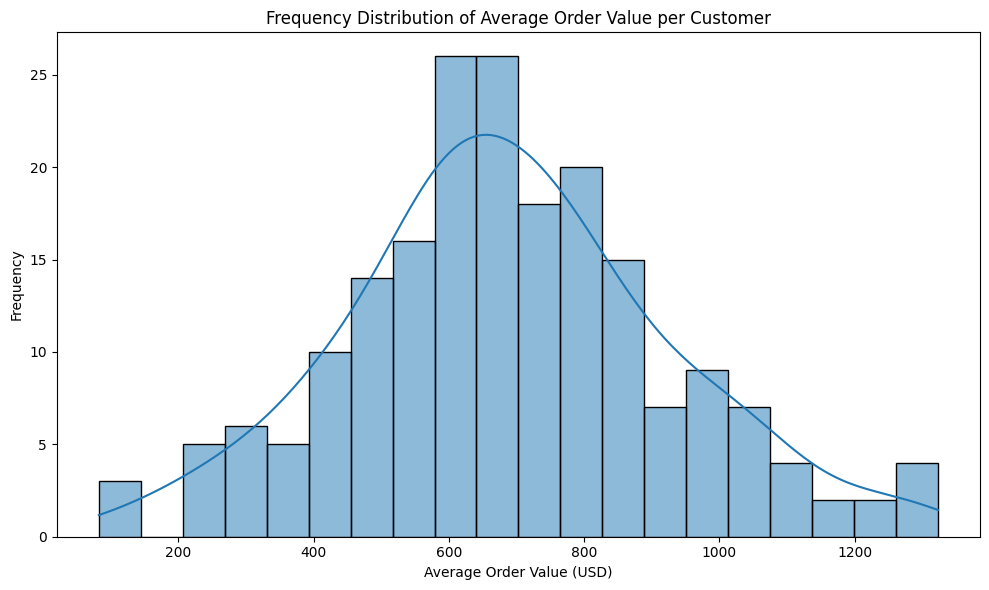

In [ ]:
average_order_value = merged_data.groupby('CustomerID')['TotalValue'].mean()
plt.figure(figsize=(10, 6))
sns.histplot(average_order_value, kde=True, bins=20)
plt.title('Frequency Distribution of Average Order Value per Customer')
plt.xlabel('Average Order Value ')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
round(average_order_value.mean(),2)

687.58

***Avg order value histogram depcits a bell curve so the majority of the order values will fall close to the average (687.58)nand we  move further away from the mean (either higher or lower), the number of customers with such values will decrease.***

In [ ]:
most_sold_products = merged_data.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
print(f"Most Sold Products: {most_sold_products}")

Most Sold Products: Category
Books          681
Home Decor     639
Electronics    627
Clothing       590
Name: Quantity, dtype: int64


***Most Sold category is Books but there is not remarkable difference in number of products sold in other category . All 4 category are comparable in qty***

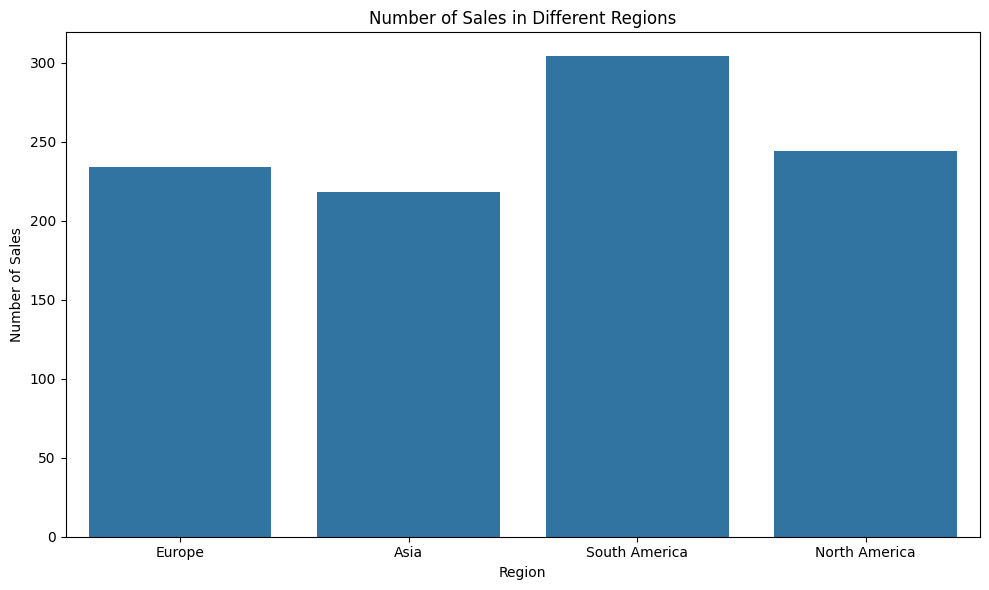

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Region', data=merged_data)
plt.title('Number of Sales in Different Regions')
plt.xlabel('Region')
plt.ylabel('Number of Sales')
plt.tight_layout()

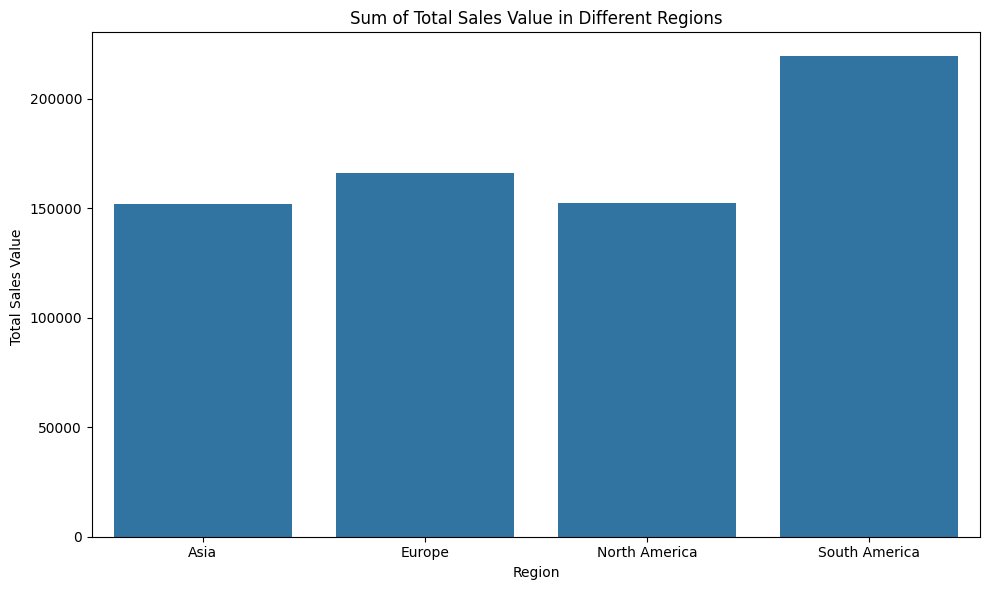

In [ ]:
total_value_by_region = merged_data.groupby('Region')['TotalValue'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='TotalValue', data=total_value_by_region)
plt.title('Sum of Total Sales Value in Different Regions')
plt.xlabel('Region')
plt.ylabel('Total Sales Value ')
plt.tight_layout()

plt.show()

***Provided E-Commerce have the highes sales from South America reason could be most number of their customers are from south america and customers from South America has done most number of transaction***

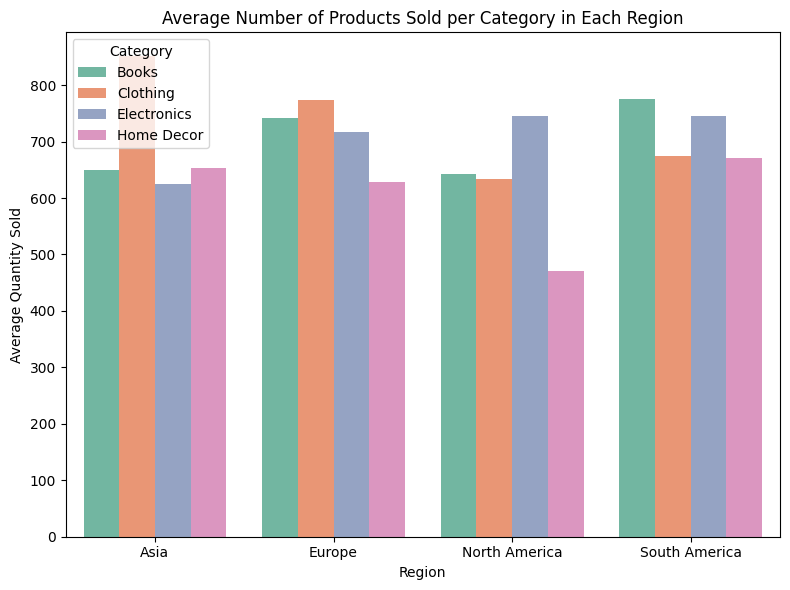

In [ ]:
avg_products_sold = merged_data.groupby(['Region', 'Category'])['TotalValue'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Region', y='TotalValue', hue='Category', data=avg_products_sold)
plt.title('Average Number of Products Sold per Category in Each Region')
plt.xlabel('Region')
plt.ylabel('Average Quantity Sold')
plt.tight_layout()

plt.show()


In [ ]:
avg_products_sold = merged_data.groupby(['Region', 'Category'])['TotalValue'].mean().reset_index().sort_values(by='Region')

print("Average Number of Products Sold per Category in Each Region:")
print(avg_products_sold)

Average Number of Products Sold per Category in Each Region:
           Region     Category  TotalValue
0            Asia        Books  649.392745
1            Asia     Clothing  850.915345
2            Asia  Electronics  625.581579
3            Asia   Home Decor  652.782692
4          Europe        Books  741.631562
5          Europe     Clothing  773.097660
6          Europe  Electronics  716.596552
7          Europe   Home Decor  629.108000
8   North America        Books  643.261385
9   North America     Clothing  633.974833
10  North America  Electronics  745.273833
11  North America   Home Decor  470.279492
12  South America        Books  775.022556
13  South America     Clothing  673.706190
14  South America  Electronics  744.890127
15  South America   Home Decor  670.982222


asia => clothing
Europe => clothing
North A => Electronic
South A => Books

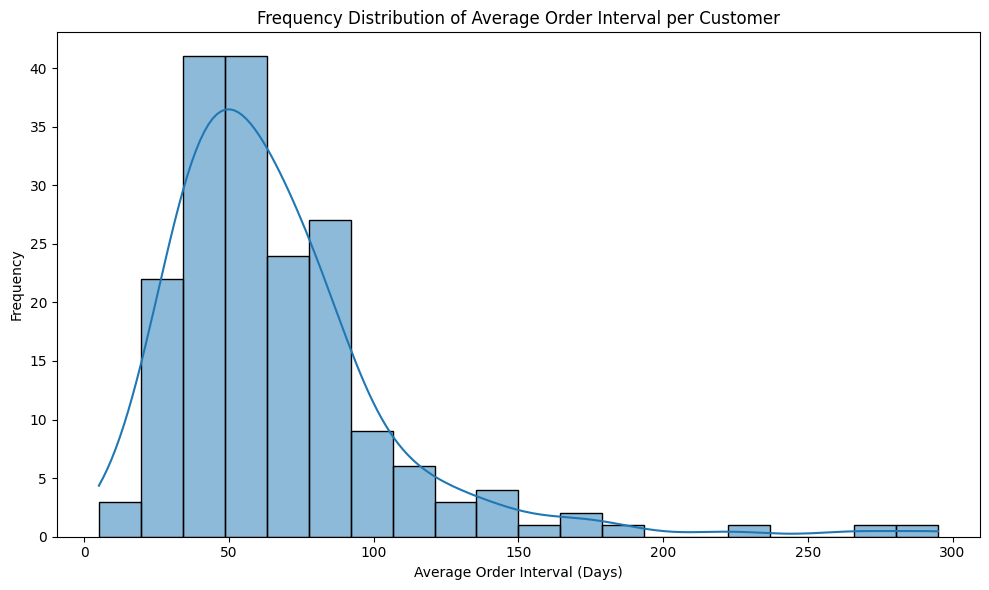

In [ ]:
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])

merged_data = merged_data.sort_values(by=['CustomerID', 'TransactionDate'])

merged_data['OrderInterval'] = merged_data.groupby('CustomerID')['TransactionDate'].diff().dt.days

avg_interval_per_customer = merged_data.groupby('CustomerID')['OrderInterval'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.histplot(avg_interval_per_customer['OrderInterval'], kde=True, bins=20)
plt.title('Frequency Distribution of Average Order Interval per Customer')
plt.xlabel('Average Order Interval (Days)')
plt.ylabel('Frequency')
plt.tight_layout()

plt.show()


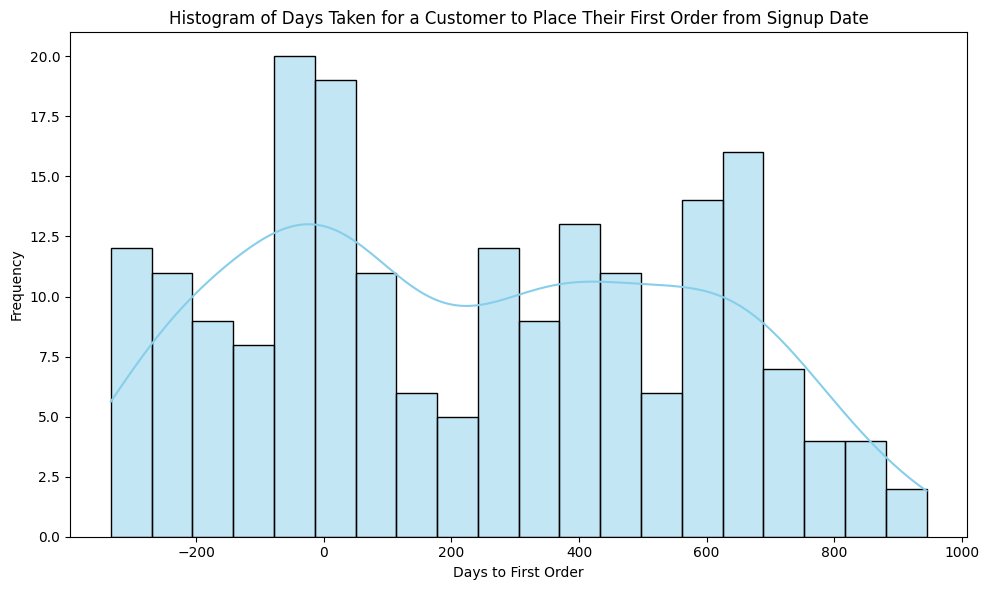

In [ ]:
merged_data = merged_data.sort_values(by=['CustomerID', 'TransactionDate'])
customer_df['SignupDate'] = pd.to_datetime(customer_df['SignupDate'])
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])

first_order_per_customer = merged_data.groupby('CustomerID').first().reset_index()
first_order_per_customer['DaysToFirstOrder'] = (first_order_per_customer['TransactionDate'] - first_order_per_customer['SignupDate']).dt.days

plt.figure(figsize=(10, 6))
sns.histplot(first_order_per_customer['DaysToFirstOrder'], kde=True, bins=20, color='skyblue')
plt.title('Histogram of Days Taken for a Customer to Place Their First Order from Signup Date')
plt.xlabel('Days to First Order')
plt.ylabel('Frequency')
plt.tight_layout()

plt.show()


In [ ]:
negative_days_customers = first_order_per_customer[first_order_per_customer['DaysToFirstOrder'] < 0]

print(f"Number of customers with negative 'DaysToFirstOrder': {negative_days_customers.shape[0]}")

Number of customers with negative 'DaysToFirstOrder': 62


In [ ]:
print(f'total number of customers : {first_order_per_customer.shape[0]}')


total number of customers : 199


***62 customers of 199 customers have their first order before signup . This could be some error in data collections are a option in E Commerce website to place order as guest etc .
Only around 18 of 199 are placing with order within first 50 days . This shows there is a gap in customer on boarding new customers can be given some offer on their first order.***

In [ ]:
merged_data['Month'].value_counts().sort_index()

,count
Month,
2023-12,4
2024-01,107
2024-02,77
2024-03,80
2024-04,86
2024-05,86
2024-06,69
2024-07,96
2024-08,94


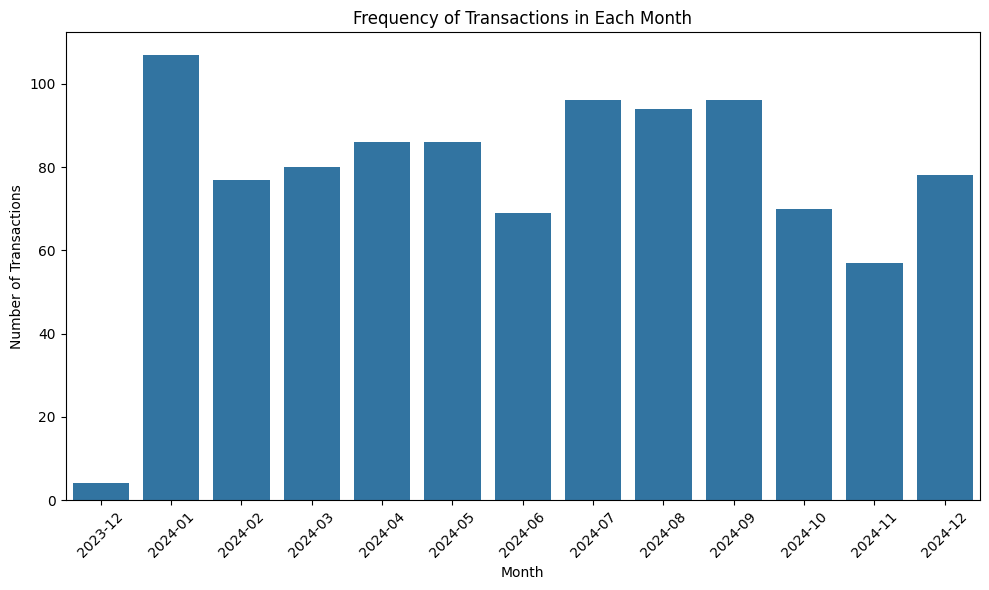

In [ ]:
transaction_counts_per_month = merged_data['Month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=transaction_counts_per_month.index.astype(str), y=transaction_counts_per_month.values)
plt.title('Frequency of Transactions in Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


***The data shows a peak in January 2024, a stable pattern from February to October 2024, with a dip in November 2024 and a slight recovery in December 2024.***

***Orders peak in January, likely due to effective promotions and marketing to start the year. Sales stay steady from February to October, with a dip in November, possibly because customers are waiting for holiday discounts in December and January. To counter this, offering special coupons for November orders, redeemable in December and January, could help maintain momentum.***

In [ ]:
most_sold_by_quantity = merged_data.groupby(['Month', 'ProductName'])['Quantity'].sum().reset_index()
most_sold_by_quantity = most_sold_by_quantity.loc[most_sold_by_quantity.groupby('Month')['Quantity'].idxmax()]

most_sold_by_value = merged_data.groupby(['Month', 'ProductName'])['TotalValue'].sum().reset_index()
most_sold_by_value = most_sold_by_value.loc[most_sold_by_value.groupby('Month')['TotalValue'].idxmax()]

print("Most Sold Product by Quantity in Each Month:")
print(most_sold_by_quantity[['Month', 'ProductName', 'Quantity']])

print("\nMost Sold Product by Total Value in Each Month:")
print(most_sold_by_value[['Month', 'ProductName', 'TotalValue']])


Most Sold Product by Quantity in Each Month:
       Month             ProductName  Quantity
0    2023-12       ActiveWear Jacket         4
50   2024-01           TechPro Novel        15
78   2024-02     HomeSense Desk Lamp        15
129  2024-03    SoundWave Headphones        19
182  2024-04      TechPro Headphones        15
192  2024-05   ActiveWear Smartwatch        15
261  2024-06  SoundWave Mystery Book        14
303  2024-07    SoundWave Headphones        16
352  2024-08      SoundWave Cookbook        18
374  2024-09   ActiveWear Smartwatch        15
446  2024-10    SoundWave Headphones        13
477  2024-11       HomeSense T-Shirt        11
502  2024-12      ActiveWear T-Shirt        12

Most Sold Product by Total Value in Each Month:
       Month              ProductName  TotalValue
0    2023-12        ActiveWear Jacket     1585.36
46   2024-01          SoundWave Novel     4298.10
57   2024-02           ActiveWear Rug     3756.33
129  2024-03     SoundWave Headphones     4904.6

***Winter-related Products like Jackets, activewear, and products suited for colder weather peak during December and January.
Fitness and Tech Items like smartwatches and headphones are popular in spring and summer, often tied to outdoor activities, fitness goals, or travel.
Books sees a rise in sumer, particularly in June and July, aligning with vacation periods when people tend to read more.***